In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls drive/My\ Drive/Colab\ Notebooks

 bert
'catboost (1).ipynb'
'Catboost for Imbalanced Data .ipynb'
 catboost.ipynb
 cbmodel.p
'Copy of Pima_Dataset 1.ipynb'
 corpus.csv
 corpus.gsheet
 creditcard.csv
 data.p
 hypteropt.ipynb
 Kshitij_Mamgain_PySpark.ipynb
' MCT Natural Language Processing - Text Analysis.ipynb'
 pima.csv
'Pima_Dataset 1.ipynb'
'Pima Dataset.ipynb'
 Untitled
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 Untitled4.ipynb
 Untitled5.ipynb
 Untitled6.ipynb


In [0]:
import dask.dataframe as dd

In [0]:
import pandas as pd
df = pd.read_csv("drive/My Drive/Colab Notebooks/pima.csv", header = None)

In [0]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
# 11 million rows last 500,000 is test
df.tail()

,0,1,2,3,4,5,6,7,8
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [0]:
import requests
import io

In [0]:
#higgs UCI dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz'

In [0]:
higgs = requests.get(url)

In [0]:
filename = url.split("/")[-1]
with open(filename, "wb") as f:

    f.write(higgs.content)

In [0]:
data = dd.read_csv("HIGGS.csv.gz", header = None, compression='gzip', blocksize=None)

In [0]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN

from sklearn.manifold import TSNE

import seaborn as sns

import numpy as np

from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


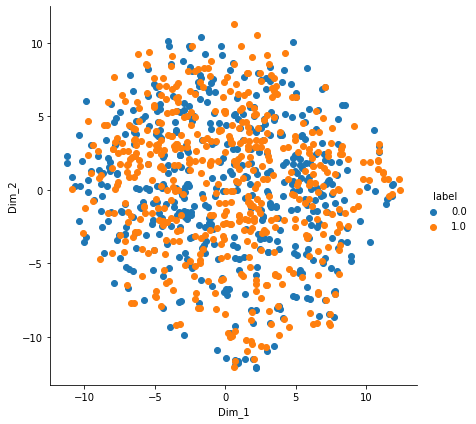

In [0]:
standardized_data = StandardScaler().fit_transform(df.drop(columns = ['Unnamed: 0','0']))

data_selected= standardized_data[0:1000,:]

labels_selected = df['0'][0:1000]

model = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=90)

tsne_data = model.fit_transform(data_selected)

tsne_data = np.vstack((tsne_data.T, labels_selected)).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


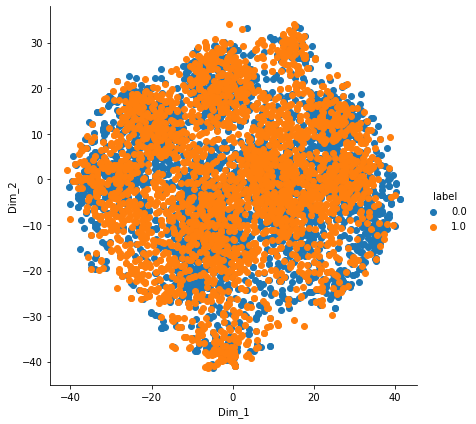

In [0]:
# Maybe there are some clusters???!?! lets do a uniform sampling from data

from numpy.random import uniform

indices = uniform(0,standardized_data.shape[0], 5000)

indices_list = [int(x) for x in indices]

sampled_data = standardized_data[indices_list,]

sampled_target = df['0'][indices_list] 

 

 

# In[9]:

 

 

model = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=90)

 

tsne_data = model.fit_transform(sampled_data)

tsne_data = np.vstack((tsne_data.T, sampled_target)).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

 

sns.FacetGrid(tsne_df, hue="label", size=6)     .map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()

    

plt.show()

In [0]:
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

MAX_EVALS = 500
N_FOLDS = 10

In [0]:
df = pd.read_csv("drive/My Drive/Colab Notebooks/train_test_files_sample.csv")

In [0]:
df.drop( columns='Unnamed: 0', inplace =True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,1.0,0.848430,0.851195,1.723261,0.161712,-0.688872,1.038643,0.045525,0.627159,2.173076,1.407727,0.417751,-0.850205,2.214872,0.472597,-0.042609,-1.730974,0.000000,0.681297,-0.951545,1.241732,0.000000,0.455958,0.951264,0.979708,0.929979,1.762546,0.951372,0.784570
1,1.0,0.410672,-2.304464,-0.638889,0.527247,-1.053383,0.895186,-1.603208,0.307285,0.000000,1.151513,-1.087878,-1.507679,2.214872,1.197562,-0.862743,-0.497240,0.000000,1.798049,-1.144760,0.791698,3.101961,0.890829,0.959105,0.981807,0.861394,1.151072,0.784608,0.696082
2,1.0,0.709160,-0.128618,-1.454535,0.742821,-1.734547,1.343786,-0.489199,-0.091968,2.173076,0.714880,-1.224842,-1.174781,0.000000,1.407254,-1.296932,0.773761,1.274112,0.434482,0.833195,1.613523,0.000000,1.093998,1.154499,0.981247,1.533215,1.461229,1.360782,1.142573
3,1.0,1.263129,0.968071,1.659452,0.827597,1.260435,0.666443,-0.663480,0.199182,1.086538,0.908897,-0.709042,-0.871844,2.214872,0.541441,0.036583,1.584784,0.000000,0.946854,0.368480,0.353318,0.000000,0.725245,0.869467,0.989487,1.179879,0.942378,0.991208,0.796980
4,0.0,1.665200,0.462581,-0.157267,0.741436,0.905371,0.597279,0.097017,0.676499,0.000000,0.915067,0.879153,1.472418,2.214872,0.997178,0.380657,-1.340995,2.548224,1.048841,0.466753,-0.834855,0.000000,1.036636,0.859889,1.259423,1.044747,0.629774,0.796595,0.715983


In [0]:
df.shape

(1050000, 29)

In [0]:

train_X, val_X, train_y, val_y = train_test_split( df.drop(columns = '0'), df['0'], random_state = 30, train_size = 0.95)

In [0]:
train_X.shape, val_X.shape

((997500, 28), (52500, 28))

In [0]:
# drop last columns

def col_keep(df):
  return df.drop(columns = list(map(str,range(22,29))), inplace = True) # removing 7 last columns


In [0]:
col_keep(train_X)
col_keep(val_X)

In [0]:
# creating lgb dataset

train_set = lgb.Dataset(data=train_X, label = train_y)

# Hyperopt Light GBM

In [0]:
import csv
from hyperopt import STATUS_OK
from timeit import default_timer as timer

def objective(params, n_folds = N_FOLDS):
    """Objective function for Gradient Boosting Machine Hyperparameter Optimization"""
    
    # Keep track of evals
    global ITERATION
    
    ITERATION += 1
    
    # Retrieve the subsample if present otherwise set to 1.0
    subsample = params['boosting_type'].get('subsample', 1.0)
    
    # Extract the boosting type
    params['boosting_type'] = params['boosting_type']['boosting_type']
    params['subsample'] = subsample
    
    # Make sure parameters that need to be integers are integers
    for parameter_name in ['num_leaves', 'subsample_for_bin', 'min_child_samples']:
        params[parameter_name] = int(params[parameter_name])
    
    start = timer()
    
    # Perform n_folds cross validation
    cv_results = lgb.cv(params, train_set, num_boost_round = 10000, nfold = n_folds, 
                        early_stopping_rounds = 100, metrics = 'auc', seed = 50)
    
    run_time = timer() - start
    
    # Extract the best score
    best_score = np.max(cv_results['auc-mean'])
    
    # Loss must be minimized
    loss = 1 - best_score
    
    # Boosting rounds that returned the highest cv score
    n_estimators = int(np.argmax(cv_results['auc-mean']) + 1)

    # Write to the csv file ('a' means append)
    of_connection = open(out_file, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, params, ITERATION, n_estimators, run_time])
    
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'iteration': ITERATION,
            'estimators': n_estimators, 
            'train_time': run_time, 'status': STATUS_OK}

In [0]:
# Domain Space
from hyperopt import hp
from hyperopt.pyll.stochastic import sample

In [0]:
# boosting type domain 
boosting_type = {'boosting_type': hp.choice('boosting_type', 
                                            [{'boosting_type': 'gbdt', 'subsample': hp.uniform('subsample', 0.5, 1)}, 
                                             {'boosting_type': 'dart', 'subsample': hp.uniform('subsample', 0.5, 1)},
                                             {'boosting_type': 'goss', 'subsample': 1.0}])}

# Draw a sample
params = sample(boosting_type)
params

{'boosting_type': {'boosting_type': 'dart', 'subsample': 0.975645914147544}}

In [0]:
# Retrieve the subsample if present otherwise set to 1.0
subsample = params['boosting_type'].get('subsample', 1.0)
subsample

0.975645914147544

In [0]:

# Extract the boosting type
params['boosting_type'] = params['boosting_type']['boosting_type']
params['subsample'] = subsample

params

{'boosting_type': 'dart', 'subsample': 0.975645914147544}

In [0]:
# Define the search space
space = {
    'class_weight': hp.choice('class_weight', [None, 'balanced']),
    'boosting_type': hp.choice('boosting_type', [{'boosting_type': 'gbdt', 'subsample': hp.uniform('gdbt_subsample', 0.5, 1)}, 
                                                 {'boosting_type': 'dart', 'subsample': hp.uniform('dart_subsample', 0.5, 1)},
                                                 {'boosting_type': 'goss', 'subsample': 1.0}]),
    'num_leaves': hp.quniform('num_leaves', 30, 150, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000),
    'min_child_samples': hp.quniform('min_child_samples', 20, 500, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0)
}

In [0]:
# Sample from the full space
x = sample(space)

# Conditional logic to assign top-level keys
subsample = x['boosting_type'].get('subsample', 1.0)
x['boosting_type'] = x['boosting_type']['boosting_type']
x['subsample'] = subsample

x

{'boosting_type': 'goss',
 'class_weight': None,
 'colsample_bytree': 0.6261625254078848,
 'learning_rate': 0.01173368105126703,
 'min_child_samples': 450.0,
 'num_leaves': 39.0,
 'reg_alpha': 0.0015772316716105017,
 'reg_lambda': 0.018198287665094237,
 'subsample': 1.0,
 'subsample_for_bin': 180000.0}

In [0]:
x = sample(space)
subsample = x['boosting_type'].get('subsample', 1.0)
x['boosting_type'] = x['boosting_type']['boosting_type']
x['subsample'] = subsample
x

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.9260183421830002,
 'learning_rate': 0.03917451392352638,
 'min_child_samples': 320.0,
 'num_leaves': 98.0,
 'reg_alpha': 0.7920612615394762,
 'reg_lambda': 0.6625693121010152,
 'subsample': 0.5804996219483882,
 'subsample_for_bin': 280000.0}

In [0]:

from hyperopt import tpe

# optimization algorithm
tpe_algorithm = tpe.suggest

In [0]:
from hyperopt import Trials

# Keep track of results
bayes_trials = Trials()

In [0]:
! cat> gbm_trial.csv

ok
^C


In [0]:
# File to save first results
out_file = 'gbm_trials.csv'
of_connection = open(out_file, 'w')
writer = csv.writer(of_connection)

# Write the headers to the file
writer.writerow(['loss', 'params', 'iteration', 'estimators', 'train_time'])
of_connection.close()

In [0]:
from hyperopt import fmin

# Global variable
global  ITERATION

ITERATION = 0

# Run optimization
best = fmin(fn = objective, space = space, algo = tpe.suggest, 
            max_evals = MAX_EVALS, trials = bayes_trials, rstate = np.random.RandomState(50))

100%|██████████| 3/3 [2:02:02<00:00, 1628.07s/it, best loss: 0.23499570683561077]


In [0]:
#reference link
https://github.com/WillKoehrsen/hyperparameter-optimization

pandas.core.series.Series

In [0]:
best

{'boosting_type': 0,
 'class_weight': 1,
 'colsample_by_tree': 0.8970523178797932,
 'gdbt_subsample': 0.6614743075688195,
 'learning_rate': 0.035742378218536576,
 'min_child_samples': 45.0,
 'num_leaves': 138.0,
 'reg_alpha': 0.5005020213127344,
 'reg_lambda': 0.45121616279208887,
 'subsample_for_bin': 260000.0}

In [0]:
ITERATION = 0

# Run optimization
best = fmin(fn = objective, space = space, algo = tpe.suggest, 
            max_evals = MAX_EVALS, trials = bayes_trials, rstate = np.random.RandomState(50))

  1%|          | 4/490 [2:06:02<162:30:29, 1203.76s/it, best loss: 0.23499570683561077]